In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from keras.datasets import mnist

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


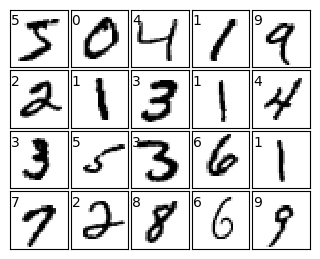

In [23]:
fig = plt.figure(figsize=(3, 3))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(y_train[i]))

In [24]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)  

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [25]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [28]:
print(f'Total number of components used after PCA : {pca.n_components_}')

Total number of components used after PCA : 331


In [29]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

print(f'train_img shape : {train_img.shape}')
print(f'test_img shape : {test_img.shape}')

train_img shape : (60000, 331)
test_img shape : (10000, 331)


In [30]:
from sklearn.decomposition import PCA
list_variance = [.85, .90, .95, .99]
train_data = []
test_data = []
i = 0

for variance in list_variance:
  print(f'Dataset dimensional reduction with {variance*100}% variance retained')
  print('='*60)

  pca = PCA(n_components=variance)
  pca.fit(X_train)

  train_data.append(pca.transform(X_train))
  test_data.append(pca.transform(X_test))

  print(f'> Total number of components for variance {variance} : {pca.n_components_}')
  print(f'> Train data shape : {train_data[i].shape}')
  print(f'> Test data shape  : {test_data[i].shape}\n')
  i += 1

Dataset dimensional reduction with 85.0% variance retained
> Total number of components for variance 0.85 : 185
> Train data shape : (60000, 185)
> Test data shape  : (10000, 185)

Dataset dimensional reduction with 90.0% variance retained
> Total number of components for variance 0.9 : 236
> Train data shape : (60000, 236)
> Test data shape  : (10000, 236)

Dataset dimensional reduction with 95.0% variance retained
> Total number of components for variance 0.95 : 331
> Train data shape : (60000, 331)
> Test data shape  : (10000, 331)

Dataset dimensional reduction with 99.0% variance retained
> Total number of components for variance 0.99 : 543
> Train data shape : (60000, 543)
> Test data shape  : (10000, 543)



In [31]:
components = [185, 236, 331, 543, 784]
components_reduction = []

for cc in components:
  z = (1.0 - (cc / 784)) * 100
  z = round(z, 2)
  components_reduction.append(z)

components_reduction

[76.4, 69.9, 57.78, 30.74, 0.0]

In [32]:
train_time = [43.96, 49.2, 54.9,64.47, 76.19]
train_time_reduction = []

for time in train_time:
  reduction = (1.0 - (time / 76.19)) * 100
  reduction = round(reduction, 2)
  train_time_reduction.append(reduction)

train_time_reduction

[42.3, 35.42, 27.94, 15.38, 0.0]

In [33]:

accuracy = [0.9722, 0.9744, 0.9733, 0.9735, 0.9744]
accuracy_diff = []

for acc in accuracy:
  x = 0.9744 - acc
  x = round(x, 4)
  accuracy_diff.append(x)

accuracy_diff

[0.0022, 0.0, 0.0011, 0.0009, 0.0]

In [34]:
result = {'Data Variance' : ['85%', '90%', '95%', '99%', '100%'], 
          'Components' : components,
          'Components Reduction (%)' : components_reduction,
          'Accuracy' : accuracy,
          'Accuracy Difference' : accuracy_diff,
          'Train Time': train_time,
          'Train time Reduction (%)' : train_time_reduction,
          }
res_df = pd.DataFrame(result)
res_df

,Data Variance,Components,Components Reduction (%),Accuracy,Accuracy Difference,Train Time,Train time Reduction (%)
0,85%,185,76.40,0.9722,0.0022,43.96,42.30
1,90%,236,69.90,0.9744,0.0000,49.20,35.42
2,95%,331,57.78,0.9733,0.0011,54.90,27.94
3,99%,543,30.74,0.9735,0.0009,64.47,15.38
4,100%,784,0.00,0.9744,0.0000,76.19,0.00
